In [159]:
import tensorflow as tf
import numpy as np

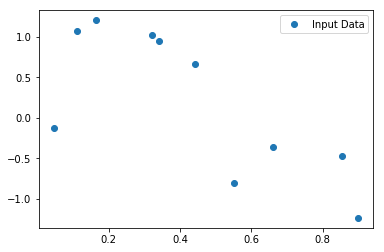

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
number_of_points = 10

train_data = np.loadtxt('hw1training.txt')
test_data = np.loadtxt('hw1test.txt')
x_point = np.transpose(np.array([train_data[:,0]]))
y_point = np.transpose(np.array([train_data[:,1]]))

'''
a = 0.22
b = 0.78

for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = a*x + b +np.random.normal(0.0,0.1)
    x_point.append([x])
    y_point.append([y])
'''
plt.plot(x_point,y_point, 'o', label='Input Data')
plt.legend()
plt.show()

At step  0  cost function is :  0.722081


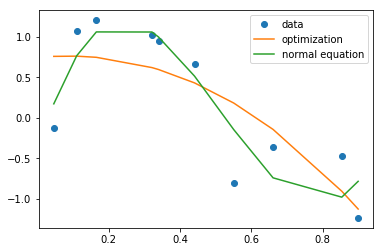

In [163]:
m_input = tf.placeholder(tf.float32 ,shape=[number_of_points, 1], name='input')

#with tf.name_scope('Variables'):
A3 = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='coef3')
A2 = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='coef2')
A1 = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='coef1')
A0 = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='coef0')
b = tf.Variable(tf.zeros([1]), name='bias')

#def polynomial_model(degree=1):
    
    
#with tf.name_scope('Model'):
model = A2 * x_point**3 + A1 * x_point**2 + A0 * x_point + b #A3 * x_point**4 + 


#with tf.name_scope('Metrics'):
cost_function = tf.reduce_mean(tf.square(model - y_point)) 
optimizer = tf.train.GradientDescentOptimizer(0.4) #Bad results
#optimizer = tf.train.AdamOptimizer(0.4) #Good results
#with tf.name_scope('Training'):
train = optimizer.minimize(cost_function)

#####
x_mat = np.hstack((x_point**3, x_point**2, x_point, np.ones((10,1))))
sol,_,_,_ = np.linalg.lstsq(x_mat, y_point)
closed_form_sol = np.matmul(x_mat, sol)
#####

steps = 1000 

with tf.get_default_graph().as_default():
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for i in range(steps):
            feed_dict = {m_input: np.array(x_point, dtype=np.float32)}
            sess.run(train, feed_dict=feed_dict)
            if(i%1000 == 0):
                print('At step ', i, ' cost function is : ', sess.run(cost_function))
        writer = tf.summary.FileWriter('./linear_regression', sess.graph)
        writer.close()
        # Plotting results
        plt.plot(x_point,y_point,'o' ,label='data')
        plt.plot(x_point, sess.run(model), label='optimization')
        plt.plot(x_point, closed_form_sol, label='normal equation')
        plt.legend()
        plt.show()
        

### Another Linear Regression Model

In [44]:
train_data = np.loadtxt('hw1training.txt')
test_data = np.loadtxt('hw1test.txt')
x_try = np.transpose(np.array([train_data[:,0]]))
x_try.shape

(10, 1)

In [123]:
X = np.zeros((10,4))

x_mat = np.hstack((x_point**3, x_point**2, x_point, np.ones((10,1))))
sol = np.transpose(np.matrix([np.linalg.lstsq(x_mat, y_point)]))
closed_form_sol = np.array([x_mat * sol])
print(type(closed_form_sol))

<class 'numpy.ndarray'>


In [142]:
x_mat = np.hstack((x_point**3, x_point**2, x_point, np.ones((10,1))))
sol,_,_,_ = np.linalg.lstsq(x_mat, y_point)
#closed_form_sol = x_mat * sol

print(sol)
print(x_mat.shape)
print(sol[0,0])

[[ 26.63157154]
 [-41.22683776]
 [ 15.15451613]
 [ -0.43970048]]
(10, 4)
26.6315715409


In [146]:
np.matmul(x_mat, sol)

array([[ 0.17128186],
       [ 0.7645448 ],
       [ 1.05853841],
       [ 1.0574037 ],
       [ 0.99574141],
       [ 0.51327768],
       [-0.14777138],
       [-0.74211316],
       [-0.98039439],
       [-0.7851266 ]])